This tutorial is based on script found [here](http://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/)

In [2]:
import cv2
import os

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
basedir = os.path.join('/users/j35/git/notebooks/myIPythonNotebookTutorial/registration/', 'data')

In [6]:
im0_file = os.path.join(basedir,'image_0.tiff')
im1_file = os.path.join(basedir,'image_55.tiff')
print(os.path.isfile(im0_file))

True


In [7]:
print(im0_file)
im0 = cv2.imread(im0_file, cv2.IMREAD_ANYDEPTH)
im1 = cv2.imread(im1_file, cv2.IMREAD_ANYDEPTH)

/users/j35/git/notebooks/myIPythonNotebookTutorial/registration/data/image_0.tiff


* Preview of images

<IPython.core.display.Javascript object>


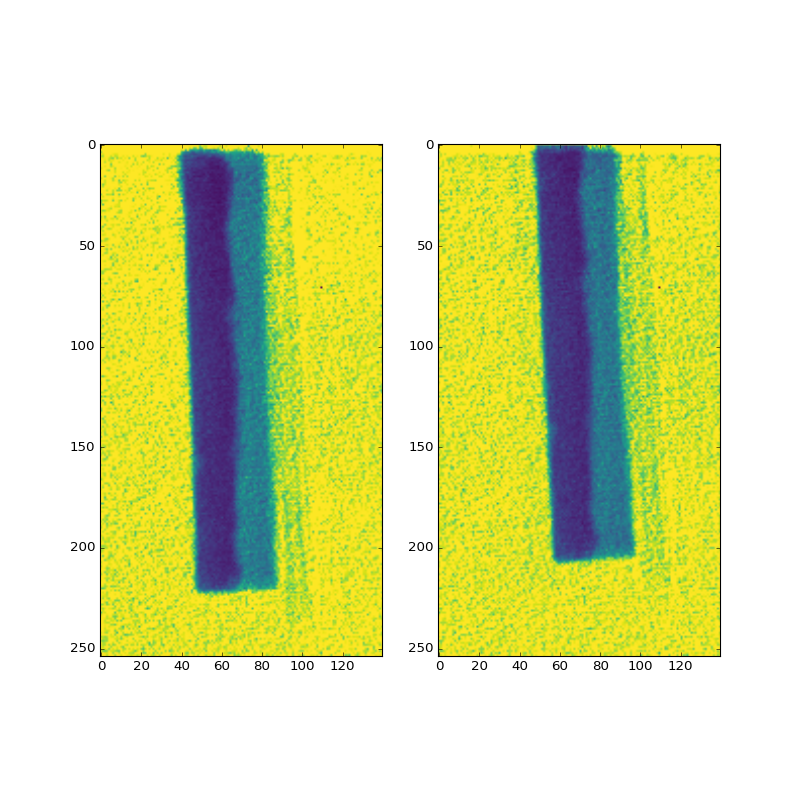

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im0, cmap='viridis')
plt.subplot(1,2,2)
plt.imshow(im1, cmap='viridis')

* Checking image array

In [9]:
print(im0)

[[ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 ..., 
 [ 0.92403442  0.78281283  0.7557286  ...,  1.          0.80332839  1.        ]
 [ 0.97908515  1.          0.96044558 ...,  0.98821169  0.99342465
   0.93526334]
 [ 1.          0.98653334  1.         ...,  0.98394704  0.95564753  1.        ]]


In [10]:
sz = im0.shape
print(sz)

(254, 140)


Define the motion model

In [11]:
warp_mode = cv2.MOTION_TRANSLATION

Define 2x3 matrix and initialize the matrix to identify

In [12]:
warp_matrix = np.eye(2, 3, dtype=np.float32)

Specify the number of iterations

In [13]:
number_of_iterations = 5000;

Specify the threshold of the increment in the correlation coefficient between two iterations

In [14]:
termination_eps = 1e-10;

Define termination criteria

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps )

Run the ECC algorithm. The results are stored in warp_matrix

In [16]:
(cc, warp_matrix) = cv2.findTransformECC(im0, im1, warp_matrix, warp_mode, criteria)

Use warpAffine for Translation, Euclidean and Affine

In [17]:
im1_aligned = cv2.warpAffine(im1, warp_matrix, (sz[1], sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

Show final results

<IPython.core.display.Javascript object>


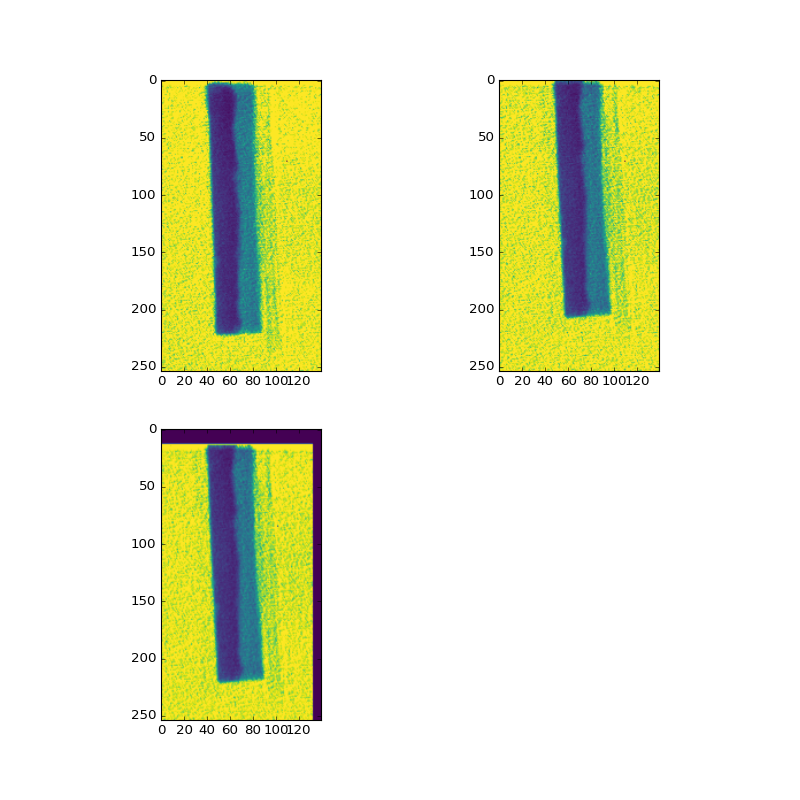

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im0, cmap='viridis')
plt.subplot(2,2,2)
plt.imshow(im1, cmap='viridis')
plt.subplot(2,2,3)
plt.imshow(im1_aligned, cmap='viridis')

Export result to compage in imageJ

In [21]:
from PIL import Image

In [19]:
im1_aligned_file = os.path.join(basedir,'image_1_aligned.tiff')

In [22]:
new_image_aligned = Image.fromarray(im1_aligned)

In [23]:
new_image_aligned.save(im1_aligned_file)

# Seems to work great !